### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions

1. [Sigmoid Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=Sis7i5TdmSMx&line=1&uniqifier=1)
2. [ReLu Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=GgzqbxsxmSM_)
3. [Hyperbolic Tangent Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=GEpEdhyZLxQ3&line=1&uniqifier=1) 
4. [Linear Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=LWpEARn_NUQg&line=1&uniqifier=1)
5. [Hard Sigmoid Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=zIarCp17OEDn&line=1&uniqifier=1)
6. [Softplus Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=JCsfPACZOz7R&line=1&uniqifier=1)
7. [Softsign Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=ddK0EuprPI9B&line=1&uniqifier=1)
8. [Selu Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=FxJ507u3PfFR&line=1&uniqifier=1)
9. [Elu Activation Function](https://colab.research.google.com/drive/1auTeAESbZgU4hL5vZUzEJDdPpKoAyx5w#scrollTo=45Pji4QwQVEh&line=1&uniqifier=1)

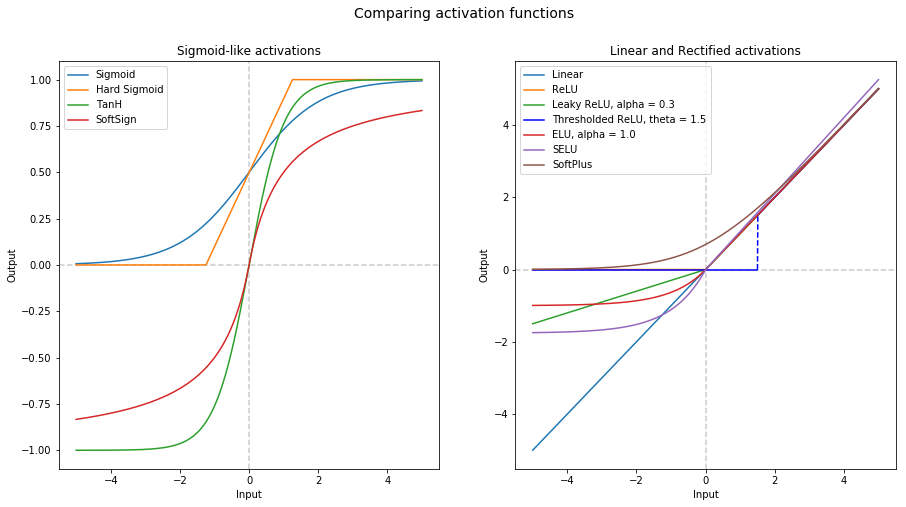

## Results of activation Funtions

In [ ]:
import pandas as pd

results = {'act': ['sigmoid', 'relu', 'tanh', 'linear', 'hard_sigmoid', 'softplus', 'softsign', 'selu', 'elu'],
           'acc': [ 0.9692,0.9745,0.9761,0.9232,0.9672,0.9750,0.9722,0.9721,0.9718 ]}

prior_fails = pd.DataFrame(results, columns=['act', 'acc'])

prior_fails.set_index('act', inplace=True)

prior_fails

,acc
act,
sigmoid,0.9692
relu,0.9745
tanh,0.9761
linear,0.9232
hard_sigmoid,0.9672
softplus,0.9750
softsign,0.9722
selu,0.9721
elu,0.9718


In [ ]:
clr=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8']
clrA=['C0', 'C1', 'C8', 'C0', 'C0','C1','C1','C1','C1']
clrL=['C1', 'C1', 'C8', 'C0', 'C0','C1','C1','C1','C1']

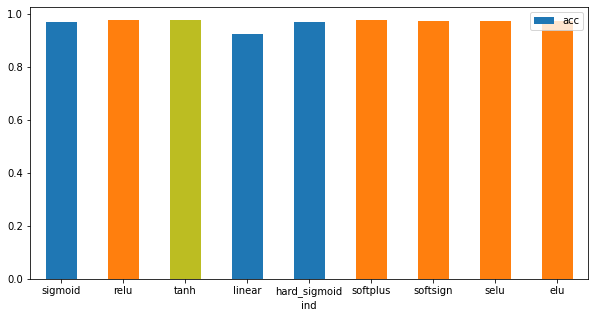

In [ ]:
acc1  =[ 0.9692,0.9745,0.9761,0.9232,0.9672,0.9750,0.9722,0.9721,0.9718 ]
loss1 =[0.099,0.085,0.081,0.280,0.109,0.089,0.093,0.092,0.091]

ind1  =['sigmoid', 'relu', 'tanh', 'linear', 'hard_sigmoid', 'softplus', 'softsign', 'selu', 'elu']

df = pd.DataFrame({"ind": ind1,
                   "acc": acc1 })


ax = df.plot.bar(x='ind', y='acc', rot=0,color=clrA,figsize=(10,5))

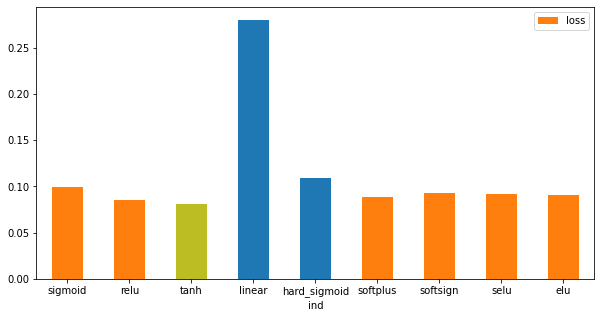

In [ ]:
df = pd.DataFrame({"ind": ind1,
                   "loss": loss1 })


ax = df.plot.bar(x='ind', y='loss', rot=0,color=clrL,figsize=(10,5))

#### **Wall clock time vs. CPU time**
Wall clock time measures how much time has passed, as if you were looking at the clock on your wall. CPU time is how many seconds the CPU was busy.

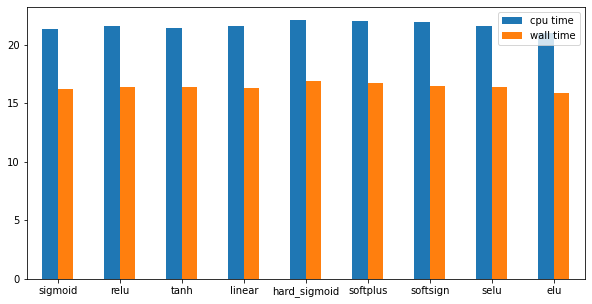

In [ ]:
CPU_time = [21.3,21.6,21.4,21.6,22.1,22,21.9,21.6,21]
Wall_time = [16.2,16.4,16.4,16.3,16.9,16.7,16.5,16.4,15.9]
index = ind1
df = pd.DataFrame({'cpu time': CPU_time,
                   'wall time': Wall_time}, index=index)
ax = df.plot.bar(rot=0,figsize=(10,5))


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4079 - accuracy: 0.6618 - val_loss: 0.3452 - val_accuracy: 0.9070
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.9115 - val_loss: 0.2395 - val_accuracy: 0.9299
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2300 - accuracy: 0.9

### Relu Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6110 - accuracy: 0.8345 - val_loss: 0.1933 - val_accuracy: 0.9414
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1791 - accuracy: 0.9480 - val_loss: 0.1468 - val_accuracy: 0.9566
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1239 - accuracy: 0.9

### Hyperbolic Tangent Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(784,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 0.5819 - accuracy: 0.8420 - val_loss: 0.2167 - val_accuracy: 0.9359
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1879 - accuracy: 0.9435 - val_loss: 0.1476 - val_accuracy: 0.9554
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1409 - accuracy: 0.958

### Linear Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='linear', input_shape=(784,)))
model.add(Dense(64, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5777 - accuracy: 0.8331 - val_loss: 0.2928 - val_accuracy: 0.9169
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.9169 - val_loss: 0.2849 - val_accuracy: 0.9218
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2791 - accuracy: 0.9

### Hard Sigmoid Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='hard_sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='hard_sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4224 - accuracy: 0.6478 - val_loss: 0.3363 - val_accuracy: 0.9097
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3158 - accuracy: 0.9125 - val_loss: 0.2417 - val_accuracy: 0.9291
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2353 - accuracy: 0.9

 ### Softplus Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='softplus', input_shape=(784,)))
model.add(Dense(64, activation='softplus'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7317 - accuracy: 0.7980 - val_loss: 0.2607 - val_accuracy: 0.9274
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2479 - accuracy: 0.9268 - val_loss: 0.1988 - val_accuracy: 0.9390
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1900 - accuracy: 0.

### Softsign Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='softsign', input_shape=(784,)))
model.add(Dense(64, activation='softsign'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7057 - accuracy: 0.8350 - val_loss: 0.2260 - val_accuracy: 0.9338
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2094 - accuracy: 0.9390 - val_loss: 0.1673 - val_accuracy: 0.9514
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1580 - accuracy: 0.

### Selu Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='selu', input_shape=(784,)))
model.add(Dense(64, activation='selu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5451 - accuracy: 0.8393 - val_loss: 0.2499 - val_accuracy: 0.9254
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2245 - accuracy: 0.9343 - val_loss: 0.1716 - val_accuracy: 0.9470
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.

### Elu Activation Function

In [ ]:
%%time

model = Sequential()
model.add(Dense(64, activation='elu', input_shape=(784,)))
model.add(Dense(64, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5802 - accuracy: 0.8373 - val_loss: 0.2153 - val_accuracy: 0.9359
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2048 - accuracy: 0.9411 - val_loss: 0.1554 - val_accuracy: 0.9522
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.

### Write your findings about activations here?

1.   **Hyperbolic tangent activation function** produced the best results according to accuracy and loss values
2.   According to wall time,we achieved fastest results by **Elu function**





# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 15s - loss: 1.8398 - acc: 0.5610 - val_loss: 1.3080 - val_acc: 0.7207
Epoch 2/2
60000/60000 [==============================] - 11s - loss: 0.9784 - acc: 0.7753 - val_loss: 0.7332 - val_acc: 0.8147
Test loss: 0.7331901484489441
Test accuracy: 0.8147
Shape of First Layer (784, 8)
Visualization of F

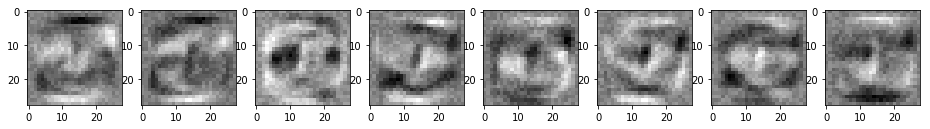

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3519 - accuracy: 0.6513 - val_loss: 0.3531 - val_accuracy: 0.9147
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3222 - accuracy: 0.9148 - val_loss: 0.2337 - val_accuracy: 0.9335
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2156 - accuracy: 0

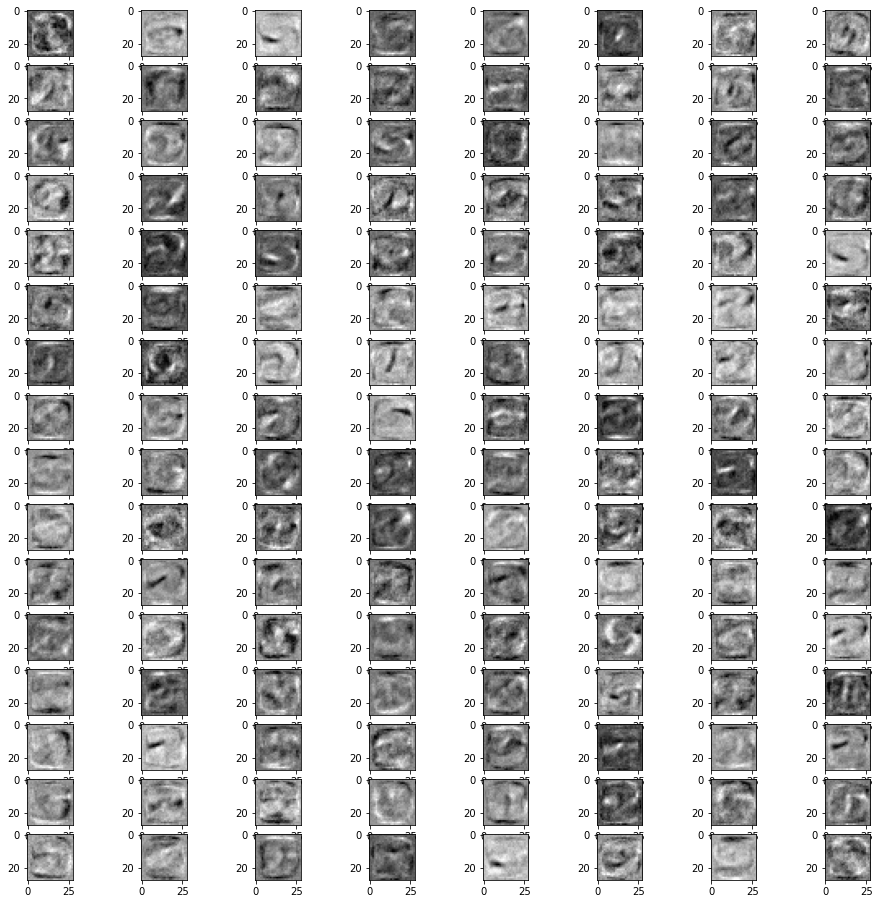

In [ ]:
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

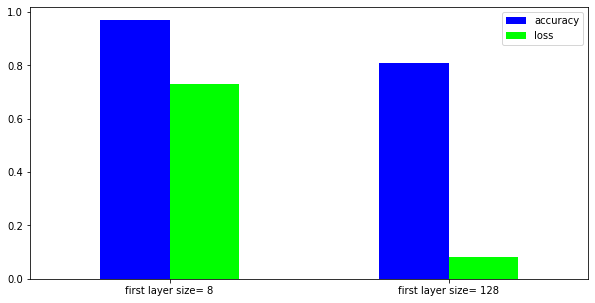

In [ ]:
  
colors = [ 'blue', 'lime'] 


accFL= [0.97,0.81]
lossFL = [0.73,0.08]
indexFL = ["first layer size= 8","first layer size= 128"]
df = pd.DataFrame({'accuracy': accFL,
                   'loss': lossFL}, index=indexFL)
ax = df.plot.bar(rot=0,figsize=(10,5),color=colors)


### Write your findings about influence of nodes here?

1.   **Finding 1** </br>
Test loss: 0.7331901484489441</br>
Test accuracy: 0.8147
2.   **Finding 2**</br>
Test loss: 0.08937299251556396</br>
Test accuracy: 0.972000002861023

When we increased the number of first layer, the loss value decreased 


# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7720 - accuracy: 0.7922 - val_loss: 0.2708 - val_accuracy: 0.9241
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9243 - val_loss: 0.2238 - val_accuracy: 0.9348
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2114 - accuracy: 0.9407 - val_loss: 0.1967 - val_accuracy: 0.9419
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1878 - acc

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8158 - accuracy: 0.7532 - val_loss: 0.23

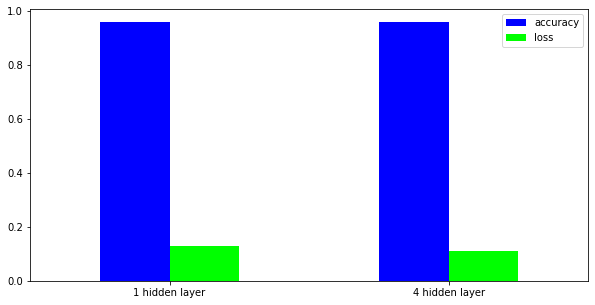

In [ ]:
colors = [ 'blue', 'lime'] 

accHL= [0.96,0.96]
lossHL = [0.13,0.11]
indexHL = ["1 hidden layer","4 hidden layer"]
df = pd.DataFrame({'accuracy': accHL,
                   'loss': lossHL}, index=indexHL)
ax = df.plot.bar(rot=0,figsize=(10,5),color=colors)

### Write your findings about influence of layers here?
1.   **Finding 1: 1 hidden layer** </br>
Test loss: 0.13070350885391235</br>
Test accuracy: 0.9624999761581421
2.   **Finding 2: 4 hidden layer**</br>
Test loss: 0.11186274141073227</br>
Test accuracy: 0.9696999788284302

When we increased the number of hidden layers, the loss value decreased.



